# Homework 3: Augmented Reality with Planar Homographies

Pablo Agustin Ortega Kral A00344664

#
---

# Q1 Preliminaries

## Q1.1 The Direct Linear Transform


### Q1.1.1 (3 points)

How many degrees of freedom does **h** have?

**A:** 8 degrees of freedom.

Given that H is a $3 \times 3$ matrix, this means it has 9 elements, if reordered into a column vector $h$ this means it will have shape of $1 \times 9$. This would suggests 9 Degrees of Freedom. However, given that we are working with homogenous coordinates, which are scale invariant, we loss one DoF resulting in 8.

For convinience, we can fix the scale such that the magnitude of $h$ equals one.

### Q1.1.2 (2 points)

How many point pairs are required to solve **h**?

**A:** 4 points.

Given that we wish to determine 8 parameters of $h$ we need at least 4 point pairs. 


### Q1.1.3 (5 points)

Derive $\textbf{A}_i$

**A:** 

$$ A_i = \begin{bmatrix} 
x_2^i & y_2^i & 1 & 0 & 0 & 0 & -x_1^ix_2^i & -x_1^iy_2^i & -x_1^i \\
0 & 0 & 0 & x_2^i & y_2^i & 1 & -y_1^ix_2^i & -y_1^iy_2^i & -y_1^i
\end{bmatrix}
$$

We begin by expanding the homography $\mathbf{x}_1^i = H\mathbf{x}_2^i$, note that for simplicity we will ommit the superscript.

$$
\begin{bmatrix}
x_1 \\
y_1 \\
1
\end{bmatrix} = 
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}\\
\end{bmatrix}
\begin{bmatrix}
x_2 \\
y_2 \\
1
\end{bmatrix}
$$

$$
\begin{bmatrix}
x_1 \\
y_1 \\
1
\end{bmatrix} = 
\begin{bmatrix}
h_{11}x_2 +h_{12}y_2 + h_{13} \\
h_{21}x_2 + h_{22}y_2 + h_{23}  \\
h_{31}x_2 +h_{32}y_2 + h_{33}\\
\end{bmatrix}
$$

Given that the $1 = h_{31}x_2 +h_{32}y_2 + h_{33}$ and we are in homogenous coordinates, we can write $x_1$ and $y_1$ as,

$$ x_1(h_{31}x_2 +h_{32}y_2 + h_{33}) = h_{11}x_2 +h_{12}y_2 + h_{13} \\
   y_1(h_{31}x_2 +h_{32}y_2 + h_{33}) = h_{21}x_2 + h_{22}y_2 + h_{23} $$

Expanding this we obtain,

$$ h_{31}x_1x_2 +h_{32}x_1y_2 + h_{33}x_1 =  h_{11}x_2 +h_{12}y_2 + h_{13} \\
   h_{31}y_1x_2 +h_{32}y_1y_2 + h_{33}y_1 =  h_{21}x_2 + h_{22}y_2 + h_{23} $$

$$ 0 =  h_{11}x_2 +h_{12}y_2 + h_{13} -h_{31}x_1x_2 -h_{32}x_1y_2 - h_{33}x_1 \\
   0 =  h_{21}x_2 + h_{22}y_2 + h_{23} -h_{31}y_1x_2 -h_{32}y_1y_2 -h_{33}y_1 $$

Reordering for convinience and expressing all 0 elements in each expression

$$ 0 =  h_{11}x_2 + h_{12}y_2 + h_{13} + 0h_{21} + 0h_{22} + 0 h_{23} -h_{31}x_1x_2 -h_{32}x_1y_2 - h_{33}x_1 \\
   0 =  0h_{11} + 0h_{12}    + 0h_{13} +  h_{21}x_2 + h_{22}y_2 + h_{23} -h_{31}y_1x_2 -h_{32}y_1y_2 -h_{33}y_1 $$

Re-shaping $H$ as a column vector $h = \begin{bmatrix} h_11 & h_12 & h_13 & h_21 & h_22 & h_23 & h_31 & h_32 & h_33\end{bmatrix}^T$, we can rewrite the expression as follows, note that for correctness we re-include the superscript

$$ \begin{bmatrix} 
x_2^i & y_2^i & 1 & 0 & 0 & 0 & -x_1^ix_2^i & -x_1^iy_2^i & -x_1^i \\
0 & 0 & 0 & x_2^i & y_2^i & 1 & -y_1^ix_2^i & -y_1^iy_2^i & -y_1^i
\end{bmatrix} \begin{bmatrix} h_{11} \\ h_{12} \\ h_{13} \\ h_{21} \\ h_{22} \\ h_{23} \\ h_{31} \\ h_{32} \\ h_{33} \end{bmatrix} = \begin{bmatrix}  0 \\ 0\end{bmatrix}$$


$$ A_i = \begin{bmatrix} 
x_2^i & y_2^i & 1 & 0 & 0 & 0 & -x_1^ix_2^i & -x_1^iy_2^i & -x_1^i \\
0 & 0 & 0 & x_2^i & y_2^i & 1 & -y_1^ix_2^i & -y_1^iy_2^i & -y_1^i
\end{bmatrix}
$$


$$ A_i\mathbf{h} = \begin{bmatrix}  0 \\ 0\end{bmatrix}$$

### Q1.1.4 (5 points)

What will be the trivial solution for **h**? Is the matrix **A** full rank? Why/Why not? What impact will it have on the singular values (i.e. eigenvalues of $\textbf{A}^T\textbf{A}$)?

- The trivial solution is $\mathbf{h} = 0$.

- We know that $A$, which is size $2N \times 9$ can never be full-rank in cases where $2N > 9$ given that it is constructed from a homography that only has 8 degrees of freedom.

- If $A$ were full-rank this means that the system of equations would only have one unique solution corresponding to the trivial case, therefore it would not be possible to find a valid homography.

- Another way of framing the problem is that the solution $\mathbf{A}$ lies in the nullspace of $A$. Whenever $A$ is not full-rank this nullspace exits and we can find a valid homography. Given that this non-trivial nullspace exits, there must also exist a eigenvalue with value zero, whose corresponding eigenvector is the solution to the homography.




## Q1.2 Homography Theory Questions

### Q1.2.1 (5 points)

Prove that there exists a homography **H** that satisfies $\textbf{x}_1 ≡ \textbf{Hx}_2$, given two cameras separated by a pure rotation.

Given that the cameras are separated by a pure rotation, the projections for a point $\mathbf{X}$ for each camera are

$$ x_1 = K_1\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0& 1 & 0\\
\end{bmatrix}  \mathbf{X} \\
x_2 = K_2\begin{bmatrix}
r_{11} & r_{12} & r_{13} & 0 \\
r_{21} & r_{22} & r_{23} & 0 \\
r_{31} & r_{32} & r_{33} & 0\\
\end{bmatrix}  \mathbf{X} 
$$

Given that in both cases there is 0 translation and representing the rotation matrix as $R$ we have

$$ x_1 = K_1\mathbf{X} \\
   x_2 = K_2R\mathbf{X}
$$

We can rewrite $x_1$ in terms of $x_2$ by solving the seconf equation, where we obtain that $\mathbf{X} = R^{-1}K_2^{-1}x_1$,  substituting we obtain that

$$ x_1 = K_1R^{-1}K_2^{-1}x_2 $$

By multplying $K_1R^{-1}K_2^{-1}$ we get a matrix of size $3 \times 3$ representing the homography,

$$ x_1 = Hx_2$$

### Q1.2.2 (5 points):

Show that $\textbf{H}^2$ is the homography corresponding to a rotation of 2$\theta$.

We beggin by expanding $H^2$ supposing both cameras share the instrincis parameters $K_1 = K_2 = K$

$$ H^2 = (KR^{-1}K^{-1})(KR^{-1}K^{-1}) \\
   H^2 = (KR^{-1})K^{-1}KR^{-1}K^{-1}  \\
   H^2 = (KR^{-1})IR^{-1}K^{-1} \\
   H^2 = K(R^{-1})^{2}K^{-1} $$

We see that the only term that is effectively squares is $R^{-1}$ so, we want to prove that  $R^2(\theta) = R(\theta)$. Thus, we know only focuss on $R^{-1}$.

$$ R = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1
\end{bmatrix} \therefore R^{-1} = \begin{bmatrix}
\cos(\theta) & \sin(\theta) & 0 \\
-\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1
\end{bmatrix}$$

Expanding $(R^{-1})^2 =R^{-1}R^{-1}$ with WolframAlpha, we see that 

$$ (R^{-1})^2 = \begin{bmatrix}
\cos^2(\theta)-\sin^2{\theta} & 2\sin(\theta)\cos(\theta) & 0 \\
-2\sin(\theta)\cos(\theta) & \cos^2(\theta)-\sin^2{\theta} & 0 \\
0 & 0 & 1
\end{bmatrix}$$


Using the double angle identities, we have that $\sin(2\theta) = 2\sin(\theta)\cos(\theta)$ and $\cos(2\theta) = \cos^2(\theta) -\sin^2(\theta)$, substituting this in $(R^{-1})^2$ we find that, 

$$ (R^{-1})^2 = \begin{bmatrix}
\cos(2\theta) & \sin(2\theta) & 0 \\
-\sin(2\theta) & \cos(2\theta) & 0 \\
0 & 0 & 1
\end{bmatrix}$$


We indeed see then that $H^2$ is equivalent to twice the original rotation.

# Initialization

Run the following code to import the modules you'll need.

In [1]:
import os
import numpy as np
import cv2
import skimage.color
import pickle
from matplotlib import pyplot as plt
import scipy
from skimage.util import montage
import time

PATCHWIDTH = 9

def read_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

def write_pickle(path, data):
    with open(path, "wb") as f:
        pickle.dump(data, f)

def briefMatch(desc1,desc2,ratio):

    matches = skimage.feature.match_descriptors(desc1,desc2,
                                                'hamming',
                                                cross_check=True,
                                                max_ratio=ratio)
    return matches

def plotMatches(img1,img2,matches,locs1,locs2, ax = None, plt_cfg = None):

    if ax == None: 
        fig, ax = plt.subplots(nrows=1, ncols=1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    skimage.feature.plot_matched_features(img1,img2,
                                          keypoints0=locs1,keypoints1=locs2,
                                          matches=matches,ax=ax,
                                          matches_color='r',only_matches=True)
    if plt_cfg:
        ax.set_title(plt_cfg['title'])
    plt.show()
    return

def makeTestPattern(patchWidth, nbits):

    np.random.seed(0)
    compareX = patchWidth*patchWidth * np.random.random((nbits,1))
    compareX = np.floor(compareX).astype(int)
    np.random.seed(1)
    compareY = patchWidth*patchWidth * np.random.random((nbits,1))
    compareY = np.floor(compareY).astype(int)

    return (compareX, compareY)

def computePixel(img, idx1, idx2, width, center):

    halfWidth = width // 2
    col1 = idx1 % width - halfWidth
    row1 = idx1 // width - halfWidth
    col2 = idx2 % width - halfWidth
    row2 = idx2 // width - halfWidth
    return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0

def computeBrief(img, locs):

    patchWidth = 9
    nbits = 256
    compareX, compareY = makeTestPattern(patchWidth,nbits)
    m, n = img.shape

    halfWidth = patchWidth//2

    locs = np.array(list(filter(lambda x: halfWidth <= x[0] < m-halfWidth and halfWidth <= x[1] < n-halfWidth, locs)))
    desc = np.array([list(map(lambda x: computePixel(img, x[0], x[1], patchWidth, c), zip(compareX, compareY))) for c in locs])

    return desc, locs

def corner_detection(img, sigma):

    # fast method
    result_img = skimage.feature.corner_fast(img, n=PATCHWIDTH, threshold=sigma)
    locs = skimage.feature.corner_peaks(result_img, min_distance=1)
    return locs

def loadVid(path):

    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name

    cap = cv2.VideoCapture(path)

    # get fps, width, and height
    fps = cap.get(cv2.CAP_PROP_FPS)
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Append frames to list
    frames = []

    # Check if camera opened successfully
    if cap.isOpened()== False:
        print("Error opening video stream or file")

    # Read until video is completed
    while(cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()

        if ret:
            #Store the resulting frame
            frames.append(frame)
        else:
            break

    # When everything done, release the video capture object
    cap.release()
    frames = np.stack(frames)

    return frames, fps, width, height

# Download data

Download the required data and setup the results directory. If running on colab, DATA_PARENT_DIR must be <br> DATA_PARENT_DIR = '/content/' <br> <br> Otherwise, use the local directory of your choosing. Data will be downloaded to DATA_PARENT_DIR/hw3_data and a subdirectory DATA_PARENT_DIR/results will be created.

In [3]:
# Only change this if you are running locally
# Default on colab: DATA_PARENT_DIR = '/content/'

# Data will be downloaded to DATA_PARENT_DIR/hw3_data
# A subdirectory DATA_PARENT_DIR/results will be created

DATA_PARENT_DIR = 'data/'

if not os.path.exists(DATA_PARENT_DIR):
  raise RuntimeError('DATA_PARENT_DIR does not exist: ', DATA_PARENT_DIR)

RES_DIR = os.path.join(DATA_PARENT_DIR, 'results')
if not os.path.exists(RES_DIR):
  os.mkdir(RES_DIR)
  print('made directory: ', RES_DIR)


#paths different files are saved to
# OPTIONAL:
# feel free to change if funning locally
ROT_MATCHES_PATH = os.path.join(RES_DIR, 'brief_rot_test.pkl')
ROT_INV_MATCHES_PATH = os.path.join(RES_DIR, 'ec_brief_rot_inv_test.pkl')
AR_VID_FRAMES_PATH = os.path.join(RES_DIR, 'q_3_1_frames.npy')
AR_VID_FRAMES_EC_PATH = os.path.join(RES_DIR, 'q_3_2_frames.npy')

HW3_SUBDIR = 'hw3_data'
DATA_DIR = os.path.join(DATA_PARENT_DIR, HW3_SUBDIR)
ZIP_PATH = DATA_DIR + '.zip'
if not os.path.exists(DATA_DIR):
  !wget 'https://www.andrew.cmu.edu/user/hfreeman/data/16720_spring/hw3_data.zip' -O $ZIP_PATH
  !unzip -qq $ZIP_PATH -d $DATA_PARENT_DIR

made directory:  data/results
--2025-02-26 01:51:32--  https://www.andrew.cmu.edu/user/hfreeman/data/16720_spring/hw3_data.zip
Resolving www.andrew.cmu.edu (www.andrew.cmu.edu)... 128.2.42.53
Connecting to www.andrew.cmu.edu (www.andrew.cmu.edu)|128.2.42.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36434294 (35M) [application/zip]
Saving to: ‘data/hw3_data.zip’

data/hw3_data.zip   100%[===================>]  34.75M  5.89MB/s    in 6.0s    

2025-02-26 01:51:39 (5.78 MB/s) - ‘data/hw3_data.zip’ saved [36434294/36434294]



# Q2 Computing Planar Homographies

## Q2.1 Feature Detection and Matching

### Q2.1.1 (5 points):

How is the FAST detector different from the Harris corner detector that you've seen in the lectures? Can you comment on its computation performance compared to the Harris corner detector?

**A:** 

The key idea of the Harris corner detector is building a second moment matrix based on the image gradients ($A = \sum_{(x,y) \in W(x_0,y_0)} \begin{bmatrix}
I_x^2 & I_x I_y \\
I_x I_y & I_y^2\end{bmatrix}$) and assigning a cornerness score based on the eigenvalues which captures the magnitude of changes along the window. On the other hand, the FAST detector takes a more empirical approach by looking at the 16 pixels that form a circle for a candidate point and asking the questions 1) are all these points brighter than pixel considering a threshold $I_p + T$ or 2) are all these points darker than pixel considering a threshold $I_p - T$. If either is true, the point is consider a candidate. Additionally, a heuristic test is applied to quickly discard unfeasable points by looking at the values 

Given that the FAST descriptor does not need to calculate gradients for each pixel in the window, and instead only must read their intensity values and compare, it is much quicker than the Harris detector. Although this comes at the cost of robustness, the FAST descriptor has enough computational headroom to include pre-processing steps and post-processing steps, such as nonmaximal supression, to mitigate some of it's shortcomings.


### Q2.1.2 (5 points):

How is the BRIEF descriptor different from the filter banks you've seen in the lectures? Could you use any one of the those filter banks as a descriptor?

Filter banks use convolution to apply a collection of pre-designed filters tunned to each extract a relevant feature from the base image. For example, the  Leung-Malik is a collection of 48 filters including 2 Gaussians at different scales and orientation. Each filter of the bank is designined to extract specific information from the input image; by running the image through all the elements of a filter bank and concatanating their we could create a high dimensionality descriptor.

On the other hand BRIEF does not rely on convolution, it rather analyzes image patches. Within each image patch, text $n_d$ point-pair ($p_i) are randomly sampled from an isotropic gaussian; for each pair a binary value is determined by simply comparing the image intensity, the value will be the result of the boolean expression $I(p_1) < I(p_2)$.

It is worth noting that modern day CNN-based feature extractors can essentially be thought of as learned filter banks, where each of the layers are essentially a filter which extracts a relevant image descriptor. The pooling mechanism of CNNs provide us a way of handling the high dimensionality of the problem.

### Q2.1.3 (5 points):

Describe how the Hamming distance and Nearest Neighbor can be used to match interest points with BRIEF descriptors. What benefits does the Hamming distance have over a more conventional Euclidean distance measure in our setting?

The hamming distance, which is the meassure of the number of positions in which the elements of the compared vectors are different, is preferred for comparing BRIEF features as it can take advantage of the binarized nature for efficient computation using bitwise logical (XOR) operations.

### Q2.1.4 (10 points):

#### Implement the function matchPics()

In [30]:
def matchPics(I1, I2, ratio, sigma):
    """
    Match features across images

    Input
    -----
    I1, I2: Source images (RGB or Grayscale uint8)
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector

    Returns
    -------
    matches: List of indices of matched features across I1, I2 [p x 2]
    locs1, locs2: Pixel coordinates of matches [N x 2]
    """
    def format_img(img):
        if len(img.shape) == 3:
            return skimage.color.rgb2gray(img)
        else:
            return img / 255.0

    # ===== your code here! =====

    # TODO: Convert images to normalized grayscale
    I1 = format_img(I1)
    I2 = format_img(I2)

    # TODO: Detect features in both images
    i1_features = corner_detection(I1, sigma)
    i2_features = corner_detection(I2, sigma)

    # TODO: Obtain descriptors for the computed feature locations
    it1_des, locs1 = computeBrief(I1, i1_features)
    it2_des, locs2 = computeBrief(I2, i2_features)

    # TODO: Match features using the descriptors
    matches = briefMatch(it1_des, it2_des, ratio)

    return matches, locs1, locs2

#### Implement the function displayMatched

In [31]:
def displayMatched(I1, I2, ratio, sigma):
    """
    Displays matches between two images

    Input
    -----
    I1, I2: Source images
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    """

    print('Displaying matches for ratio: ', ratio, ' and sigma: ', sigma)

    # ===== your code here! =====
    # TODO: Use matchPics and plotMatches to visualize your results
    matches, locs1, locs2 = matchPics(I1, I2, ratio, sigma)
    title = 'Matches for ratio: ' + str(ratio) + ' and sigma: ' + str(sigma)
    plt_cfg = {'title': title}
    plotMatches(I1, I2, matches, locs1, locs2, plt_cfg=plt_cfg)
    


#### Visualize the matches

Use the cell below to visualize the matches. The resulting figure should look similar (but not necessarily identical) to Figure 2.

Feel free to play around with the images and parameters. Please use the original images when submitting the report.

Figure 2 parameters:

*   image1_name = "cv_cover.jpg"
*   image1_name = "cv_desk.png"
*   ratio = 0.7
*   sigma = 0.15

Displaying matches for ratio:  0.7  and sigma:  0.15


/tmp/ipykernel_385039/1549931874.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


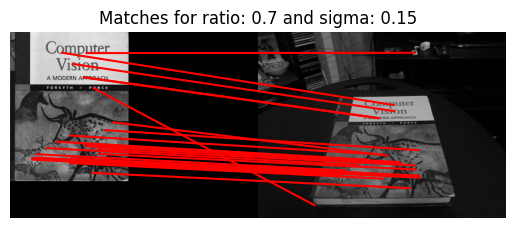

In [32]:
# Feel free to play around with these parameters
# BUT when submitting the report use the original images
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"
ratio = 0.7
sigma = 0.15

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

displayMatched(image1, image2, ratio, sigma)

### Q2.1.5 (10 points):

Experiment with different sigma and ratio values. Conduct a small ablation study, and include the figures displaying the matched features with various parameters in your write-up. Explain the effect of these two paremeters respectively.

**TODO**

Displaying matches for ratio:  0.25  and sigma:  0.05


/tmp/ipykernel_385039/1549931874.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


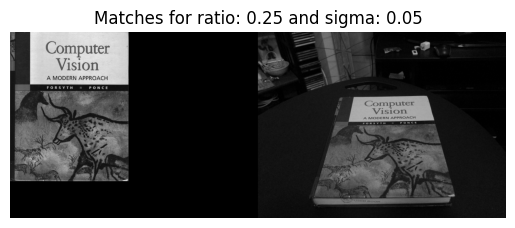

Displaying matches for ratio:  0.25  and sigma:  0.15


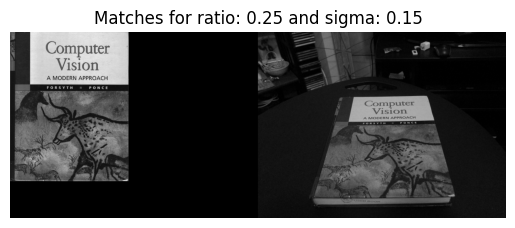

Displaying matches for ratio:  0.25  and sigma:  0.25


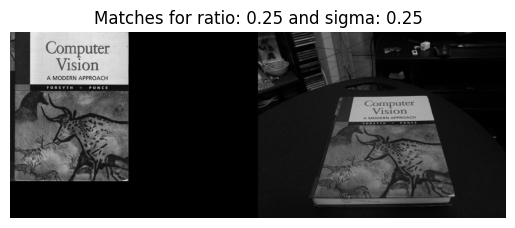

Displaying matches for ratio:  0.25  and sigma:  0.5


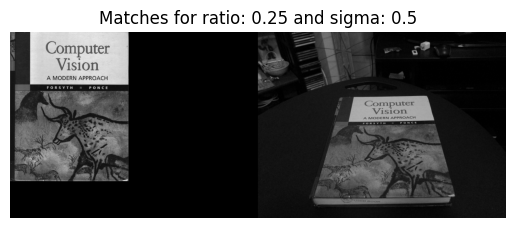

Displaying matches for ratio:  0.5  and sigma:  0.05


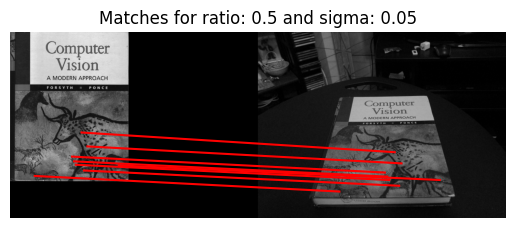

Displaying matches for ratio:  0.5  and sigma:  0.15


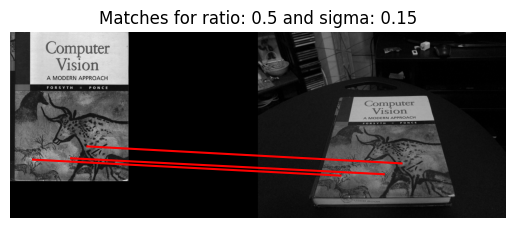

Displaying matches for ratio:  0.5  and sigma:  0.25


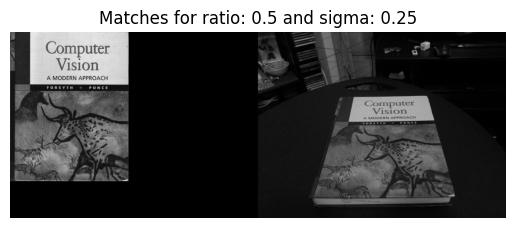

Displaying matches for ratio:  0.5  and sigma:  0.5


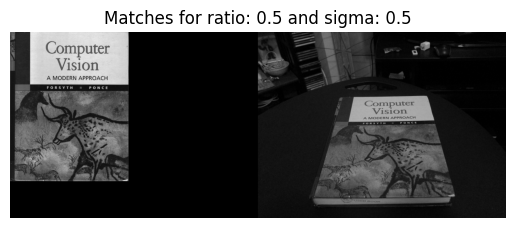

Displaying matches for ratio:  0.8  and sigma:  0.05


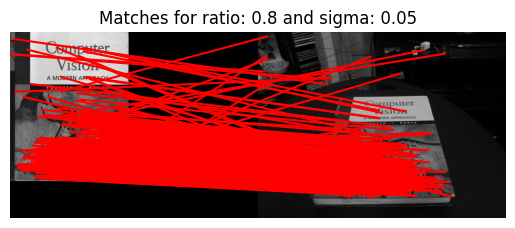

Displaying matches for ratio:  0.8  and sigma:  0.15


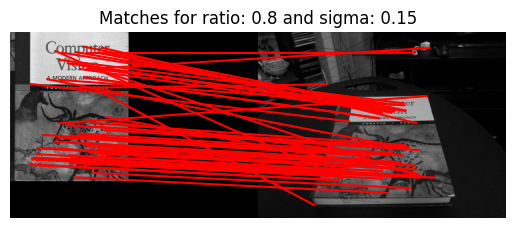

Displaying matches for ratio:  0.8  and sigma:  0.25


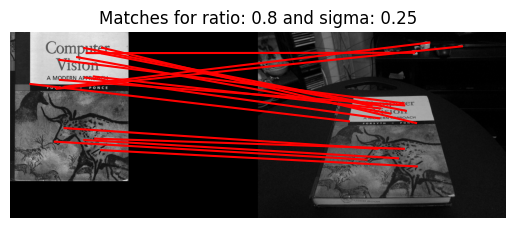

Displaying matches for ratio:  0.8  and sigma:  0.5


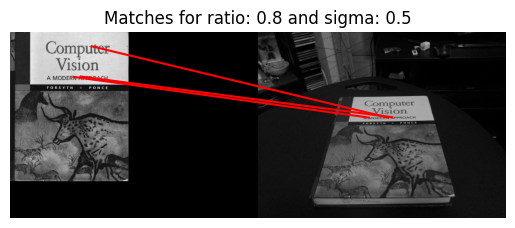

Displaying matches for ratio:  1.0  and sigma:  0.05


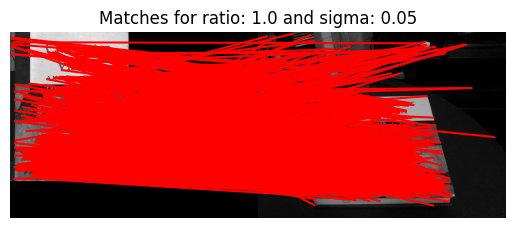

Displaying matches for ratio:  1.0  and sigma:  0.15


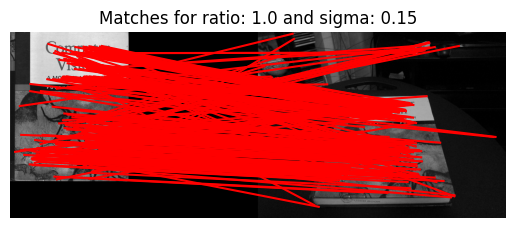

Displaying matches for ratio:  1.0  and sigma:  0.25


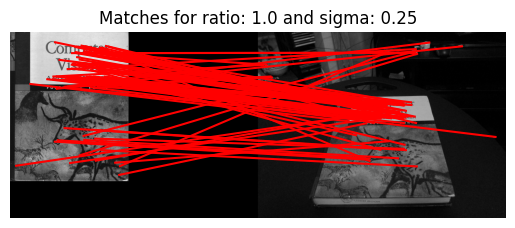

Displaying matches for ratio:  1.0  and sigma:  0.5


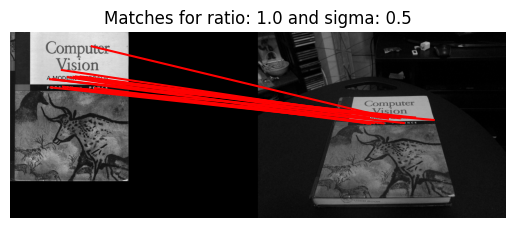

In [34]:
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


ratios = [ 0.25, 0.50, 0.80, 1.0 ]
sigmas = [ 0.05, 0.15, 0.25, 0.5 ]

for ratio in ratios:
  for sigma in sigmas:
    displayMatched(image1, image2, ratio, sigma)


### Q2.1.6 (10 points):

#### Implement the function briefRot

In [ ]:
def briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Tests Brief with rotations.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    # Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    for i in range(min_deg, max_deg, deg_inc):
        print(i)

        # ===== your code here! =====
        # TODO: Rotate Image (Hint: use scipy.ndimage.rotate)

        # TODO: Match features in images

        # TODO: visualizes matches at at least 3 different orientations
        # to include in your report
        # (Hint: use plotMatches)

        # TODO: Update match_degrees and match_counts (see descriptions above)

        # ==== end of code ====

    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_MATCHES_PATH, matches_to_save)

def dispBriefRotHist(matches_path=ROT_MATCHES_PATH):
    # Check if pickle file exists
    if not os.path.exists(matches_path):
      raise RuntimeError('matches_path does not exist. did you call briefRot?')

    # Read from pickle file
    match_counts, match_degrees, deg_inc = read_pickle(matches_path)

    # Display histogram
    # Bins are centered and separated every 10 degrees
    plt.figure()
    bins = [x - deg_inc/2 for x in match_degrees]
    bins.append(bins[-1] + deg_inc)
    plt.hist(match_degrees, bins=bins, weights=match_counts, log=True)
    #plt.hist(match_degrees, bins=[10 * (x-0.5) for x in range(37)], weights=match_counts, log=True)
    plt.title("Histogram of BREIF matches")
    plt.ylabel("# of matches")
    plt.xlabel("Rotation (deg)")
    plt.tight_layout()

    output_path = os.path.join(RES_DIR, 'histogram.png')
    plt.savefig(output_path)

#### Visualize the matches under rotation

See debugging tips in handout.


In [ ]:
# defaults are:
# min_deg = 0
# max_deg = 360
# deg_inc = 10
# ratio = 0.7
# sigma = 0.15
# filename = 'cv_cover.jpg'

# Controls the rotation degrees
min_deg = 0
max_deg = 360
deg_inc = 10

# Brief feature descriptor and Fast feature detector paremeters
# (change these if you want to use different values)
ratio = 0.7
sigma = 0.15

# image to rotate and match
# (no need to change this but can if you want to experiment)
filename = 'cv_cover.jpg'

# Call briefRot
briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename)

#### Plot the histogram

See debugging tips in handout.

In [ ]:
dispBriefRotHist()

---

Explain why you think the BRIEF descriptor behves this way: YOUR ANSWER HERE...

---

### Q2.1.7.1 (Extra Credit - 5 points):

Design a fix to make BRIEF more rotation invariant. Feel free to make any helper functions as necessary. But you cannot use any additional OpenCV or Scikit-Image functions.

In [ ]:
# ===== your code here! =====
# TODO: Define any helper functions here
# (Feel free to put anything in its own cell)

# TODO: Feel free to modify the inputs and the function body as necessary
# This is only an outline
def briefRotInvEc(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Rotation invariant Brief.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    #Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    for i in range(min_deg, max_deg, deg_inc):
        print(i)

        # TODO: Rotate Image (Hint: use scipy.ndimage.rotate)

        # TODO: Brief matcher that is rotation invariant
        # Feel free to define additional helper functions as necessary

        # TODO: visualizes matches at at least 3 different orientations
        # to include in your report
        # (Hint: use plotMatches)

        # TODO: Update match_degrees and match_counts (see descriptions above)

    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_INV_MATCHES_PATH, matches_to_save)

# ==== end of code ====

#### Visualize your implemented function


In [ ]:
min_deg = 0
max_deg = 360
deg_inc = 10
filename = 'cv_cover.jpg'

# ===== your code here! =====
# TODO: Call briefRotInvEc and visualize

# ==== end of code ====


#### Plot Histogram

In [ ]:
dispBriefRotHist(matches_path=ROT_INV_MATCHES_PATH)

---

Compare the histograms with an without rotation invariance. Explain your rotation invariant design and how you selected any parameters that you used: YOUR ANSWER HERE...

---

### Q2.1.7.2 (Extra Credit - 5 points):

Design a fix to make BRIEF more scale invariant. Feel free to make any helper functions as necessary. But you cannot use any additional OpenCV or Scikit-Image functions.


In [ ]:
# ===== your code here! =====
# TODO: Define any helper functions here
# (Feel free to put anything in its own cell)

# TODO: Modify the inputs and the function body as necessary
def briefScaleInvEc(ratio, sigma, filename):

    #Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_scales = [] # stores the scaling factors
    match_counts = [] # stores the number of matches at each scaling factor

    for i in [1]:
        # Scale Image
        image_scale = cv2.resize(image,(int(image.shape[1]/(2**i)),
                                        int(image.shape[0]/(2**i))),
                                 interpolation = cv2.INTER_AREA)

        # TODO: Brief matcher that is scale invariant
        # Feel free to define additional helper functions as necessary

        # Compare to regular matchPics
        matches_orig, locs1_orig, locs2_orig = matchPics(image,
                                                         image_scale,
                                                         ratio, sigma)

        print('plotting non-scale invariant scale: ', 2**i)
        plotMatches(image, image_scale, matches_orig, locs1_orig,
                    locs2_orig)
        print('plotting scale-invariant: ', 2**i)
        plotMatches(image, image_scale, matches, locs1, locs2)

# ==== end of code ====

#### Visualize your implemented function

In [ ]:
# ===== your code here! =====
# TODO: Call briefScaleInvEc and visualize
# You may change any parameters and the function body as necessary

filename = 'cv_cover.jpg'

ratio = 0.7
sigma = 0.15

briefScaleInvEc(ratio, sigma, filename)
# ==== end of code ====

---

Explain your scale invariant design and how you selected any parameters that you used: YOUR ANSWER HERE...

---


## Q2.2 Homography Computation

### Q2.2.1 (15 Points):

Implement the function computeH

In [ ]:
def computeH(x1, x2):
    """
    Compute the homography between two sets of points

    Input
    -----
    x1, x2: Sets of points

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1
    """

    if x1.shape != x2.shape:
        raise RuntimeError('number of points do not match')

    # ===== your code here! =====
    # TODO: Compute the homography between two sets of points

    # ==== end of code ====

    return H2to1

### Q2.2.2 (10 points):

Implement the function computeH_norm

In [ ]:
def computeH_norm(x1, x2):
    """
    Compute the homography between two sets of points using normalization

    Input
    -----
    x1, x2: Sets of points

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1
    """

    # ===== your code here! =====

    # TODO: Compute the centroid of the points


    # TODO: Shift the origin of the points to the centroid


    # TODO: Normalize the points so that the largest distance from the
    # origin is equal to sqrt(2)


    # TODO: Similarity transform 1


    # TODO: Similarity transform 2


    # TODO: Compute homography


    # TODO: Denormalization

    # ==== end of code ====

    return H2to1

### Q2.2.3 (25 points):

Implement RANSAC

In [ ]:
def computeH_ransac(locs1, locs2, max_iters, inlier_tol):
    """
    Estimate the homography between two sets of points using ransac

    Input
    -----
    locs1, locs2: Lists of points
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    bestH2to1: 3x3 homography matrix that best transforms locs2 to locs1
    inliers: indices of RANSAC inliers

    """

    # ===== your code here! =====

    # TODO:
    # Compute the best fitting homography using RANSAC
    # given a list of matching points locs1 and loc2

    # ==== end of code ====

    return bestH2to1, best_inliers

### Q2.2.4 (10 points):

#### Implement the function compositeH

In [ ]:
def compositeH(H2to1, template, img):
    """
    Returns the composite image.

    Input
    -----
    H2to1: Homography from image to template
    template: template image to be warped
    img: background image

    Returns
    -------
    composite_img: Composite image

    """

    # ===== your code here! =====
    # TODO: Create a composite image after warping the template image on top
    # of the image using the homography

    # ==== end of code ====

    return composite_img

#### Implement the function warpImage

In [ ]:
def warpImage(ratio, sigma, max_iters, inlier_tol):
    """
    Warps hp_cover.jpg onto the book cover in cv_desk.png.

    Input
    -----
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    """

    hp_cover = skimage.io.imread(os.path.join(DATA_DIR, 'hp_cover.jpg'))
    cv_cover = skimage.io.imread(os.path.join(DATA_DIR, 'cv_cover.jpg'))
    cv_desk = skimage.io.imread(os.path.join(DATA_DIR, 'cv_desk.png'))
    cv_desk = cv_desk[:, :, :3]

    # ===== your code here! =====

    # TODO: match features between cv_desk and cv_cover using matchPics

    # TODO: Scale matched pixels in cv_cover to size of hp_cover

    # TODO: Get homography by RANSAC using computeH_ransac

    # TODO: Overlay using compositeH to return composite_img
    composite_img = None

    # ==== end of code ====

    plt.imshow(composite_img)
    plt.show()

#### Visualize composite image

In [ ]:
# defaults are:
# ratio = 0.7
# sigma = 0.15
# max_iters = 600
# inlier_tol = 1.0

# (no need to change this but can if you want to experiment)
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

warpImage(ratio, sigma, max_iters, inlier_tol)

### Q2.2.5 (10 points):

Conduct ablation study with various max_iters and inlier_tol values. Plot the result images and explain the effect of these two parameters respectively.

In [ ]:
# ===== your code here! =====
# Experiment with different max_iters and inlier_tol values.
# Include the result images in the write-up.

# ==== end of code ====

---

Explain the effect of max_iters and inlier_tol: YOUR ANSWER HERE...

---

# Q3 Create a Simple Panorama

## Q3.1 Create a panorama (10 points):

#### Implement the function createPanorama

In [ ]:
def createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol):
    """
    Create a panorama augmented reality application by computing a homography
    and stitching together a left and right image.

    Input
    -----
    left_im: left image
    right_im: right image
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    panorama_im: Stitched together panorama

    """

    # ===== your code here! =====
    # TODO: match features between images
    # This can be done using matchPics, cpselect, or any other function.

    # TODO: Get homography by RANSAC using computeH_ransac

    # TODO: Stich together the two images
    # Requires the use of cv2.warpPerspective
    panorama_im = None

    # ==== end of code ====

    return panorama_im.astype(np.uint8)

#### Visualize Panorama

Make sure to use **your own images** and **include them as well as the result** in the report.

In [ ]:
left_im_path = os.path.join(DATA_DIR, 'pano_left.jpg')
left_im = skimage.io.imread(left_im_path)
right_im_path = os.path.join(DATA_DIR, 'pano_right.jpg')
right_im = skimage.io.imread(right_im_path)

# Feel free to adjust as needed
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

panorama_im = createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol)

plt.imshow(panorama_im)
plt.axis('off')
plt.show()